# 0. Описание задачи.

Задача - проанализаровать набор данных, а именно фильмов, и решить задачу классификации.
На основе обучающей и тестовой выборки исследовать оценку юмора фильма.

In [1]:
import numpy as np              # Массивы (матрицы, векторы, линейная алгебра)
import matplotlib.pyplot as plt # Научная графика
%matplotlib inline 
    # Говорим jupyter'у, чтобы весь графический вывод был в браузере, а не в отдельном окне
import pandas as pd             # Таблицы и временные ряды (dataframe, series)
import seaborn as sns           # Еще больше красивой графики для визуализации данных
import sklearn                  # Алгоритмы машинного обучения

# 1. Чтение данных.


In [102]:
url = "https://raw.githubusercontent.com/Sermjazhko/ML/master/filmtv_movies.csv"

data_raw = pd.read_csv(url)

В таблице представлено более 37 тысяч фильмов. Для каждого фильмы указаны: 

номер, название игры, год выпуска, длительность в минутах, страна, режиссеры фильма, актёры, среднее число голосов, высказанных критиками (если таковые имеются), среднее число голосов, высказанных общественностью (при наличии), общее количество голосов, высказанных критиками и общественностью, описание фильма, примечание к фильму, различные оценки фильмов (оценка юмора).

In [103]:
data_raw.shape

(37711, 19)

То есть 37 711 различных фильмов и 19 признаков.

Для примера первые пять строк данных: 

In [104]:
data_raw.head()

,filmtv_id,title,year,genre,duration,country,directors,actors,avg_vote,critics_vote,public_vote,total_votes,description,notes,humor,rhythm,effort,tension,erotism
0,2,Bugs Bunny's Third Movie: 1001 Rabbit Tales,1982,Animation,76,United States,"David Detiege, Art Davis, Bill Perez",NaN,7.7,8.00,7.0,21,"With two protruding front teeth, a slightly sl...","These are many small independent stories, whic...",3,3,0,0,0
1,3,18 anni tra una settimana,1991,Drama,98,Italy,Luigi Perelli,"Kim Rossi Stuart, Simona Cavallari, Ennio Fant...",6.5,6.00,7.0,4,"Samantha, not yet eighteen, leaves the comfort...","Luigi Perelli, the director of the ""Piovra"", o...",0,2,0,2,0
2,17,Ride a Wild Pony,1976,Romantic,91,United States,Don Chaffey,"Michael Craig, John Meillon, Eva Griffith, Gra...",5.6,6.00,5.0,9,"In the Australia of the pioneers, a boy and a ...","""Ecological"" story with a happy ending, not wi...",1,2,1,0,0
3,18,Diner,1982,Comedy,95,United States,Barry Levinson,"Mickey Rourke, Steve Guttenberg, Ellen Barkin,...",7.0,8.00,6.0,18,Five boys from Baltimore have a habit of meeti...,A cast of will be famous for Levinson's direct...,2,2,0,1,2
4,20,A che servono questi quattrini?,1942,Comedy,85,Italy,Esodo Pratelli,"Eduardo De Filippo, Peppino De Filippo, Clelia...",5.9,5.33,7.0,14,"With a stratagem, the penniless and somewhat p...",Taken from the play by Armando Curcio that the...,3,1,1,0,0


# 2. Визуализация данных. 

Все признаки фильмов: 

In [105]:
data_raw.columns

Index(['filmtv_id', 'title', 'year', 'genre', 'duration', 'country',
       'directors', 'actors', 'avg_vote', 'critics_vote', 'public_vote',
       'total_votes', 'description', 'notes', 'humor', 'rhythm', 'effort',
       'tension', 'erotism'],
      dtype='object')

Сводная информация для признаков. В нашей задаче в качестве количественных признаков выступают год выпуска, длительность, средний рейтинг (критики + публика), средний рейтинг критиков, средний рейтинг публики, количество голосов, различные оценки (юмор. 
Для каждого количественного признака приведены средние значения, стандартное отклонение, минимальное и макимальное значения, медиана и значения квартилей:

In [106]:
data_raw.describe()

,filmtv_id,year,duration,avg_vote,critics_vote,public_vote,total_votes,humor,rhythm,effort,tension,erotism
count,37711.000000,37711.000000,37711.000000,37711.000000,33626.000000,37492.000000,37711.000000,37711.000000,37711.000000,37711.000000,37711.000000,37711.000000
mean,49193.614569,1992.236244,100.644666,5.840516,5.837795,5.963566,35.462968,0.597544,1.422052,0.702395,0.962557,0.301000
std,50167.711560,23.404296,27.061535,1.412866,1.604867,1.490863,65.872978,0.897430,1.120866,1.109600,1.085195,0.614126
min,2.000000,1897.000000,41.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,14750.500000,1975.000000,90.000000,4.900000,4.670000,5.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,32582.000000,2000.000000,96.000000,6.000000,6.000000,6.000000,11.000000,0.000000,2.000000,0.000000,1.000000,0.000000
75%,60294.000000,2012.000000,107.000000,6.900000,7.000000,7.000000,34.000000,1.000000,2.000000,1.000000,2.000000,0.000000
max,207048.000000,2021.000000,1525.000000,10.000000,10.000000,10.000000,1010.000000,5.000000,5.000000,5.000000,5.000000,4.000000


В целом фильмы имеют оценку (рейтинг) выше среднего. Т.е. по 10-балльной шкале средняя оценка ~6. Есть фильмы как с высоким рейтингом и большим количеством просмотров, так и с совсем низкими оценками. 

Для удобства обработаем некоторые столбцы. 

In [107]:
data_raw["boolHumor"] = np.where(data_raw["humor"] >= 2.0, 1, 0) 

In [91]:
count = 0
for key in data_raw["humor"]:
    if key >= 2:
        count = count + 1;
count

6435

Построим диаграмму рассеивания: зависимость юмора от рейтинга критиков. 

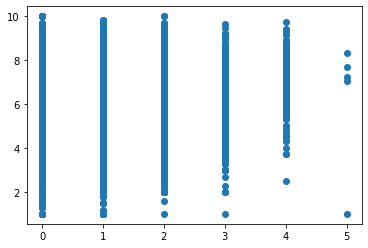

In [108]:
plt.scatter(data_raw['humor'], data_raw['critics_vote'])
pass

Делаем вывод, что критикам не нравятся смешные фильмы.

Построим зависимость юмора от рейтинга общественности: 

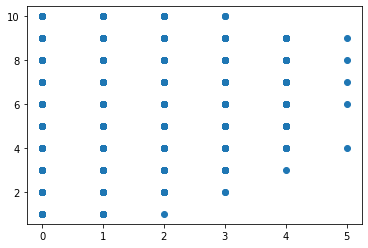

In [109]:
plt.scatter(data_raw['humor'], data_raw['public_vote'])
pass

Делаем вывод, что вообще никому смеяться не нравится.

Также можно построить зависимость длительности фильмов от рейтинга критиков. Построим рандомно 1000 точек. 

In [110]:
np.random.seed(42)
random_subset = np.random.choice(np.arange(data_raw.shape[0]), size=1000, replace=False)

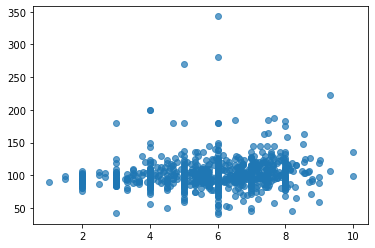

In [111]:

plt.scatter(data_raw.iloc[random_subset]['critics_vote'], data_raw.iloc[random_subset]['duration'],alpha=0.7)
pass

In [134]:
data = data_raw.loc[:, ['title', 'year', 'genre', 'duration', 'country',
       'directors', 'actors', 'avg_vote', 'critics_vote', 'public_vote',
       'total_votes', 'description', 'notes', 'humor', 'rhythm', 'effort',
       'tension', 'boolHumor']].copy()

In [135]:
data.head()

,title,year,genre,duration,country,directors,actors,avg_vote,critics_vote,public_vote,total_votes,description,notes,humor,rhythm,effort,tension,boolHumor
0,Bugs Bunny's Third Movie: 1001 Rabbit Tales,1982,Animation,76,United States,"David Detiege, Art Davis, Bill Perez",NaN,7.7,8.00,7.0,21,"With two protruding front teeth, a slightly sl...","These are many small independent stories, whic...",3,3,0,0,1
1,18 anni tra una settimana,1991,Drama,98,Italy,Luigi Perelli,"Kim Rossi Stuart, Simona Cavallari, Ennio Fant...",6.5,6.00,7.0,4,"Samantha, not yet eighteen, leaves the comfort...","Luigi Perelli, the director of the ""Piovra"", o...",0,2,0,2,0
2,Ride a Wild Pony,1976,Romantic,91,United States,Don Chaffey,"Michael Craig, John Meillon, Eva Griffith, Gra...",5.6,6.00,5.0,9,"In the Australia of the pioneers, a boy and a ...","""Ecological"" story with a happy ending, not wi...",1,2,1,0,0
3,Diner,1982,Comedy,95,United States,Barry Levinson,"Mickey Rourke, Steve Guttenberg, Ellen Barkin,...",7.0,8.00,6.0,18,Five boys from Baltimore have a habit of meeti...,A cast of will be famous for Levinson's direct...,2,2,0,1,1
4,A che servono questi quattrini?,1942,Comedy,85,Italy,Esodo Pratelli,"Eduardo De Filippo, Peppino De Filippo, Clelia...",5.9,5.33,7.0,14,"With a stratagem, the penniless and somewhat p...",Taken from the play by Armando Curcio that the...,3,1,1,0,1


Построим все возможные диаграммы рассеивания для каждой пары переменных:

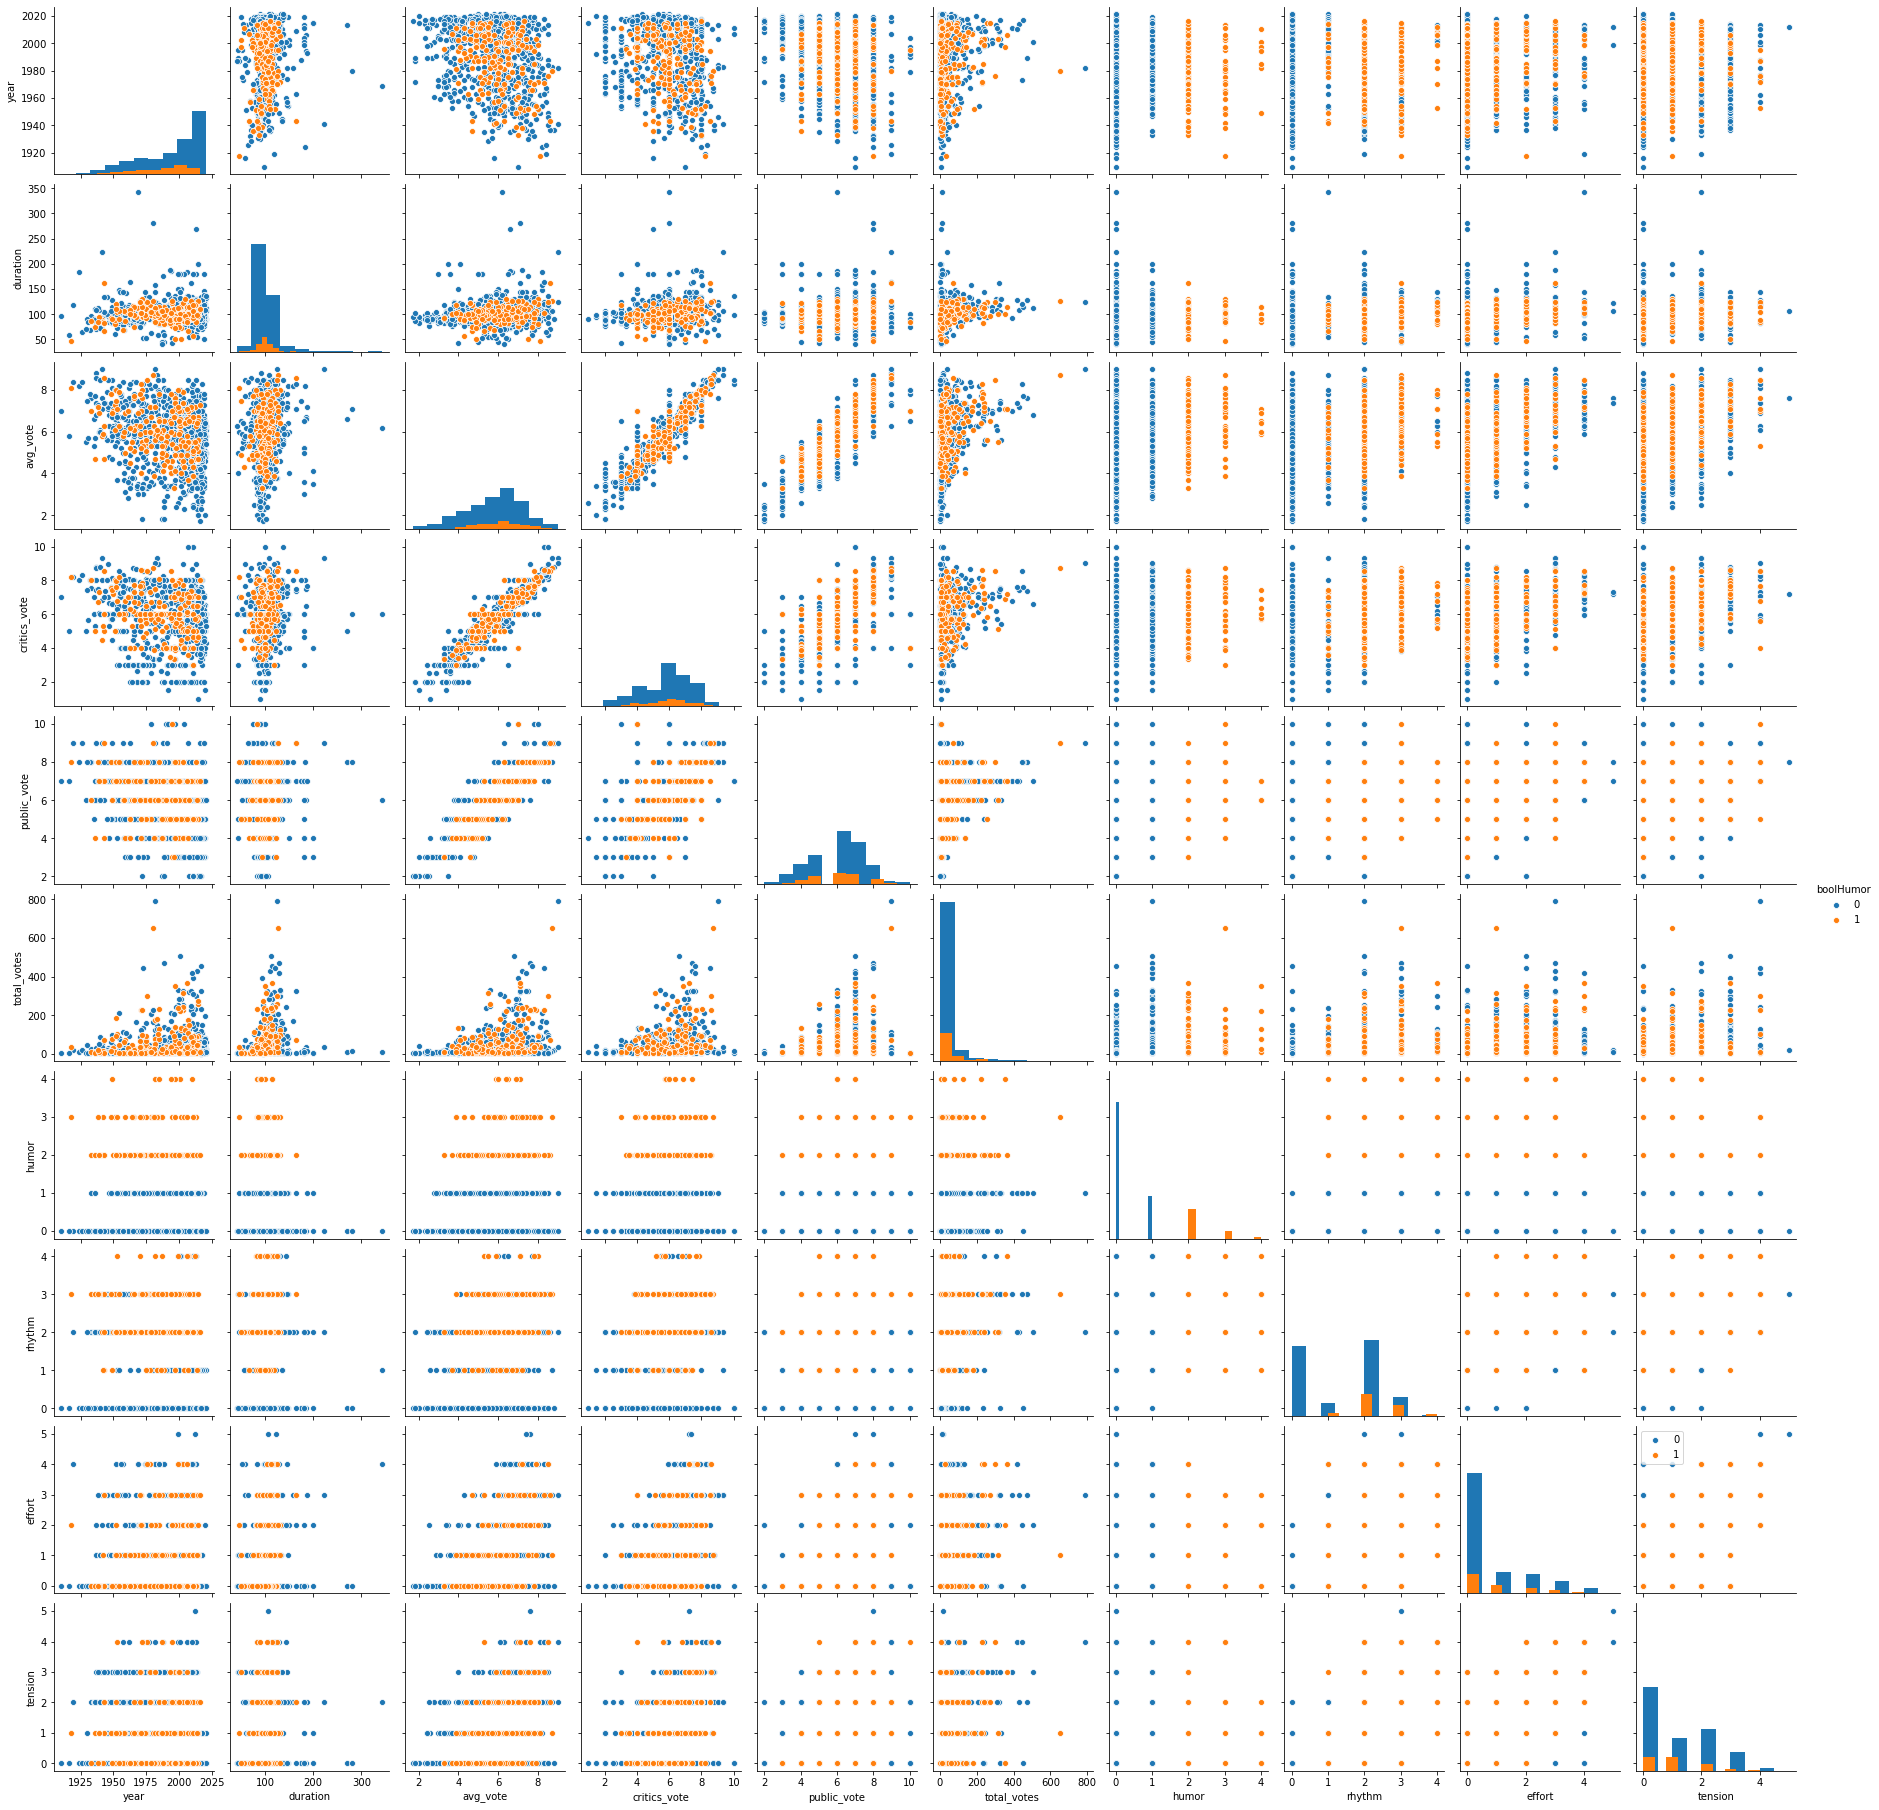

In [114]:
sns.pairplot(data.iloc[random_subset], hue='boolHumor', diag_kind='hist')
plt.legend()
pass

Отдельно построим гистограмму общего рейтинга:

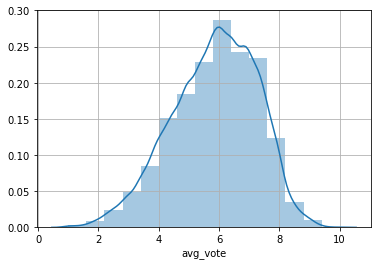

In [115]:
sns.distplot(data_raw['avg_vote'], bins=15)
plt.grid()
pass

Построим корреляционную матрицу:

In [116]:
corr_mat = data.corr()
corr_mat

,year,duration,avg_vote,critics_vote,public_vote,total_votes,humor,rhythm,effort,tension,boolHumor
year,1.000000,0.059000,-0.248912,-0.168779,-0.249307,0.059529,-0.158181,-0.316882,-0.094326,-0.275178,-0.123067
duration,0.059000,1.000000,0.141952,0.120627,0.131432,0.181644,0.005692,0.041816,0.131296,0.092290,-0.005409
avg_vote,-0.248912,0.141952,1.000000,0.914690,0.891190,0.256943,0.118404,0.192851,0.384355,0.301668,0.112549
critics_vote,-0.168779,0.120627,0.914690,1.000000,0.616518,0.238471,0.099644,0.137962,0.379895,0.264513,0.105803
public_vote,-0.249307,0.131432,0.891190,0.616518,1.000000,0.214171,0.086032,0.166271,0.315107,0.263834,0.078196
total_votes,0.059529,0.181644,0.256943,0.238471,0.214171,1.000000,0.278946,0.317662,0.339203,0.328435,0.195949
humor,-0.158181,0.005692,0.118404,0.099644,0.086032,0.278946,1.000000,0.535359,0.206951,0.111306,0.864307
rhythm,-0.316882,0.041816,0.192851,0.137962,0.166271,0.317662,0.535359,1.000000,0.460053,0.666442,0.388406
effort,-0.094326,0.131296,0.384355,0.379895,0.315107,0.339203,0.206951,0.460053,1.000000,0.507177,0.120390
tension,-0.275178,0.092290,0.301668,0.264513,0.263834,0.328435,0.111306,0.666442,0.507177,1.000000,0.030201


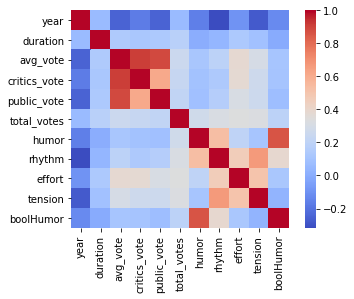

In [117]:
sns.heatmap(corr_mat, square=True, cmap='coolwarm')
pass

Из матрицы корреляции видно, что оценки критиков и общественности положительно коррелируют, а некоторые параметры имеют отрицательную корреляцию.

# 3. Обработка пропущенных значений


Пропущенные значения в таблице представлены значениями np.nan. Посмотрим, сколько пропущенных значений в каждом столбце матрицы:

In [136]:
data.isna().sum()

title               0
year                0
genre              88
duration            0
country             9
directors          29
actors           1868
avg_vote            0
critics_vote     4085
public_vote       219
total_votes         0
description      1391
notes           19606
humor               0
rhythm              0
effort              0
tension             0
boolHumor           0
dtype: int64

В нашем случае пропущенных значений довольно много, чтобы их удалить. Пропущенные значения в столбцах, соответствующих категориальным признакам, заполним модой:

In [119]:
data

,title,year,genre,duration,country,directors,actors,avg_vote,critics_vote,public_vote,total_votes,description,notes,humor,rhythm,effort,tension,boolHumor
0,Bugs Bunny's Third Movie: 1001 Rabbit Tales,1982,Animation,76,United States,"David Detiege, Art Davis, Bill Perez",NaN,7.7,8.00,7.0,21,"With two protruding front teeth, a slightly sl...","These are many small independent stories, whic...",3,3,0,0,1
1,18 anni tra una settimana,1991,Drama,98,Italy,Luigi Perelli,"Kim Rossi Stuart, Simona Cavallari, Ennio Fant...",6.5,6.00,7.0,4,"Samantha, not yet eighteen, leaves the comfort...","Luigi Perelli, the director of the ""Piovra"", o...",0,2,0,2,0
2,Ride a Wild Pony,1976,Romantic,91,United States,Don Chaffey,"Michael Craig, John Meillon, Eva Griffith, Gra...",5.6,6.00,5.0,9,"In the Australia of the pioneers, a boy and a ...","""Ecological"" story with a happy ending, not wi...",1,2,1,0,0
3,Diner,1982,Comedy,95,United States,Barry Levinson,"Mickey Rourke, Steve Guttenberg, Ellen Barkin,...",7.0,8.00,6.0,18,Five boys from Baltimore have a habit of meeti...,A cast of will be famous for Levinson's direct...,2,2,0,1,1
4,A che servono questi quattrini?,1942,Comedy,85,Italy,Esodo Pratelli,"Eduardo De Filippo, Peppino De Filippo, Clelia...",5.9,5.33,7.0,14,"With a stratagem, the penniless and somewhat p...",Taken from the play by Armando Curcio that the...,3,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37706,Death Rider in the House of Vampires,2021,Horror,92,United States,Glenn Danzig,"Devon Sawa, Julian Sands, Kim Director, Ashley...",4.0,4.00,NaN,1,"Death Rider (Devon Sawa) travels on horseback,...",NaN,0,0,0,0,0
37707,Deus tem AIDS,2021,Documentary,82,Brasil,"Fábio Leal, Gustavo Vinagre","Carué Contreiras, Ernesto Filho, Flip Couto, K...",6.0,6.00,NaN,1,"40 years after the start of the AIDS epidemic,...",The exploration of performances that are eccen...,0,0,0,0,0
37708,Beatrix,2021,Drama,95,Austria,"Milena Czernovsky, Lilith Kraxner","Eva Sommer, Katharina Farnleitner, Marthe de C...",6.0,6.00,NaN,1,A young woman spends a lot of time indoors. So...,NaN,0,0,0,0,0
37709,Abandoned Dead,2015,Horror,77,United States,Mark W. Curran,"Ivan Adame, Hannah Johnson, Sarah Nicklin, Jud...",3.0,3.00,NaN,1,"Rachel (Sarah Nicklin), despite working as a s...",NaN,0,0,0,0,0


In [137]:
data['genre'].fillna(data['genre'].mode().iloc[0], inplace=True)
data['country'].fillna(data['country'].mode().iloc[0], inplace=True)
data['directors'].fillna(data['directors'].mode().iloc[0], inplace=True)
data['actors'].fillna(data['actors'].mode().iloc[0], inplace=True)

In [121]:
data.isna().sum()

title               0
year                0
genre               0
duration            0
country             0
directors           0
actors              0
avg_vote            0
critics_vote     4085
public_vote       219
total_votes         0
description      1391
notes           19606
humor               0
rhythm              0
effort              0
tension             0
boolHumor           0
dtype: int64

Заполним медианами пропущенные значения в столбцах, соответствующих числовым признакам:

In [138]:
data.fillna(data.median(axis = 0), axis=0 , inplace=True)

Заполним своими данными текстовые признаки, потому что я чет не помню, как их обрабатывать:

In [139]:
data['description'].fillna('No description, no photo, no nothing at all!', inplace=True)
data['notes'].fillna('No description, no photo, no nothing at all!', inplace=True)

Проверяем: 

In [141]:
data.isna().sum()

title           0
year            0
genre           0
duration        0
country         0
directors       0
actors          0
avg_vote        0
critics_vote    0
public_vote     0
total_votes     0
description     0
notes           0
humor           0
rhythm          0
effort          0
tension         0
boolHumor       0
dtype: int64

In [125]:
data

,title,year,genre,duration,country,directors,actors,avg_vote,critics_vote,public_vote,total_votes,description,notes,humor,rhythm,effort,tension,boolHumor
0,Bugs Bunny's Third Movie: 1001 Rabbit Tales,1982,Animation,76,United States,"David Detiege, Art Davis, Bill Perez",Attori non professionisti,7.7,8.00,7.0,21,"With two protruding front teeth, a slightly sl...","These are many small independent stories, whic...",3,3,0,0,1
1,18 anni tra una settimana,1991,Drama,98,Italy,Luigi Perelli,"Kim Rossi Stuart, Simona Cavallari, Ennio Fant...",6.5,6.00,7.0,4,"Samantha, not yet eighteen, leaves the comfort...","Luigi Perelli, the director of the ""Piovra"", o...",0,2,0,2,0
2,Ride a Wild Pony,1976,Romantic,91,United States,Don Chaffey,"Michael Craig, John Meillon, Eva Griffith, Gra...",5.6,6.00,5.0,9,"In the Australia of the pioneers, a boy and a ...","""Ecological"" story with a happy ending, not wi...",1,2,1,0,0
3,Diner,1982,Comedy,95,United States,Barry Levinson,"Mickey Rourke, Steve Guttenberg, Ellen Barkin,...",7.0,8.00,6.0,18,Five boys from Baltimore have a habit of meeti...,A cast of will be famous for Levinson's direct...,2,2,0,1,1
4,A che servono questi quattrini?,1942,Comedy,85,Italy,Esodo Pratelli,"Eduardo De Filippo, Peppino De Filippo, Clelia...",5.9,5.33,7.0,14,"With a stratagem, the penniless and somewhat p...",Taken from the play by Armando Curcio that the...,3,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37706,Death Rider in the House of Vampires,2021,Horror,92,United States,Glenn Danzig,"Devon Sawa, Julian Sands, Kim Director, Ashley...",4.0,4.00,6.0,1,"Death Rider (Devon Sawa) travels on horseback,...","No description, no photo, no nothing at all!",0,0,0,0,0
37707,Deus tem AIDS,2021,Documentary,82,Brasil,"Fábio Leal, Gustavo Vinagre","Carué Contreiras, Ernesto Filho, Flip Couto, K...",6.0,6.00,6.0,1,"40 years after the start of the AIDS epidemic,...",The exploration of performances that are eccen...,0,0,0,0,0
37708,Beatrix,2021,Drama,95,Austria,"Milena Czernovsky, Lilith Kraxner","Eva Sommer, Katharina Farnleitner, Marthe de C...",6.0,6.00,6.0,1,A young woman spends a lot of time indoors. So...,"No description, no photo, no nothing at all!",0,0,0,0,0
37709,Abandoned Dead,2015,Horror,77,United States,Mark W. Curran,"Ivan Adame, Hannah Johnson, Sarah Nicklin, Jud...",3.0,3.00,6.0,1,"Rachel (Sarah Nicklin), despite working as a s...","No description, no photo, no nothing at all!",0,0,0,0,0


# 4. Обработка категориальных признаков.

Столбцы 'actors', 'directors', 'country', 'genre' содержат категориальные значения. Пока они имеют тип 'Object'. Заменим тип на специальный, предназначенный для хранения категориальных значений:

In [126]:
data.head()

,title,year,genre,duration,country,directors,actors,avg_vote,critics_vote,public_vote,total_votes,description,notes,humor,rhythm,effort,tension,boolHumor
0,Bugs Bunny's Third Movie: 1001 Rabbit Tales,1982,Animation,76,United States,"David Detiege, Art Davis, Bill Perez",Attori non professionisti,7.7,8.00,7.0,21,"With two protruding front teeth, a slightly sl...","These are many small independent stories, whic...",3,3,0,0,1
1,18 anni tra una settimana,1991,Drama,98,Italy,Luigi Perelli,"Kim Rossi Stuart, Simona Cavallari, Ennio Fant...",6.5,6.00,7.0,4,"Samantha, not yet eighteen, leaves the comfort...","Luigi Perelli, the director of the ""Piovra"", o...",0,2,0,2,0
2,Ride a Wild Pony,1976,Romantic,91,United States,Don Chaffey,"Michael Craig, John Meillon, Eva Griffith, Gra...",5.6,6.00,5.0,9,"In the Australia of the pioneers, a boy and a ...","""Ecological"" story with a happy ending, not wi...",1,2,1,0,0
3,Diner,1982,Comedy,95,United States,Barry Levinson,"Mickey Rourke, Steve Guttenberg, Ellen Barkin,...",7.0,8.00,6.0,18,Five boys from Baltimore have a habit of meeti...,A cast of will be famous for Levinson's direct...,2,2,0,1,1
4,A che servono questi quattrini?,1942,Comedy,85,Italy,Esodo Pratelli,"Eduardo De Filippo, Peppino De Filippo, Clelia...",5.9,5.33,7.0,14,"With a stratagem, the penniless and somewhat p...",Taken from the play by Armando Curcio that the...,3,1,1,0,1


In [142]:
data['actors'] = data['actors'].astype('category')
data['directors'] = data['directors'].astype('category')
data['country'] = data['country'].astype('category')
data['genre'] = data['genre'].astype('category')

In [143]:
data.head()

,title,year,genre,duration,country,directors,actors,avg_vote,critics_vote,public_vote,total_votes,description,notes,humor,rhythm,effort,tension,boolHumor
0,Bugs Bunny's Third Movie: 1001 Rabbit Tales,1982,Animation,76,United States,"David Detiege, Art Davis, Bill Perez",Attori non professionisti,7.7,8.00,7.0,21,"With two protruding front teeth, a slightly sl...","These are many small independent stories, whic...",3,3,0,0,1
1,18 anni tra una settimana,1991,Drama,98,Italy,Luigi Perelli,"Kim Rossi Stuart, Simona Cavallari, Ennio Fant...",6.5,6.00,7.0,4,"Samantha, not yet eighteen, leaves the comfort...","Luigi Perelli, the director of the ""Piovra"", o...",0,2,0,2,0
2,Ride a Wild Pony,1976,Romantic,91,United States,Don Chaffey,"Michael Craig, John Meillon, Eva Griffith, Gra...",5.6,6.00,5.0,9,"In the Australia of the pioneers, a boy and a ...","""Ecological"" story with a happy ending, not wi...",1,2,1,0,0
3,Diner,1982,Comedy,95,United States,Barry Levinson,"Mickey Rourke, Steve Guttenberg, Ellen Barkin,...",7.0,8.00,6.0,18,Five boys from Baltimore have a habit of meeti...,A cast of will be famous for Levinson's direct...,2,2,0,1,1
4,A che servono questi quattrini?,1942,Comedy,85,Italy,Esodo Pratelli,"Eduardo De Filippo, Peppino De Filippo, Clelia...",5.9,5.33,7.0,14,"With a stratagem, the penniless and somewhat p...",Taken from the play by Armando Curcio that the...,3,1,1,0,1


Алгоритмы из библиотеки scikit-learn (почти) не умеют работать напрямую с категориальными признаками. Поэтому их вначале надо закодировать с помощью числовых принаков.

In [144]:
data['actors'] = pd.factorize(data['actors'])[0]
data['directors'] = pd.factorize(data['directors'])[0]
data['country'] = pd.factorize(data['country'])[0]
data['genre'] = pd.factorize(data['genre'])[0]

В итоге получим: 

In [131]:
data.head()

,title,year,genre,duration,country,directors,actors,avg_vote,critics_vote,public_vote,total_votes,description,notes,humor,rhythm,effort,tension,boolHumor
0,Bugs Bunny's Third Movie: 1001 Rabbit Tales,1982,0,76,0,0,0,7.7,8.00,7.0,21,"With two protruding front teeth, a slightly sl...","These are many small independent stories, whic...",3,3,0,0,1
1,18 anni tra una settimana,1991,1,98,1,1,1,6.5,6.00,7.0,4,"Samantha, not yet eighteen, leaves the comfort...","Luigi Perelli, the director of the ""Piovra"", o...",0,2,0,2,0
2,Ride a Wild Pony,1976,2,91,0,2,2,5.6,6.00,5.0,9,"In the Australia of the pioneers, a boy and a ...","""Ecological"" story with a happy ending, not wi...",1,2,1,0,0
3,Diner,1982,3,95,0,3,3,7.0,8.00,6.0,18,Five boys from Baltimore have a habit of meeti...,A cast of will be famous for Levinson's direct...,2,2,0,1,1
4,A che servono questi quattrini?,1942,3,85,1,4,4,5.9,5.33,7.0,14,"With a stratagem, the penniless and somewhat p...",Taken from the play by Armando Curcio that the...,3,1,1,0,1


# 5. Нормализация

Стандартизация - линейное преобразование, приводящее все значения к нулевому среднему и единичному стандартному отклонению.
Выполним стандартизацию всех признаков:

In [145]:
data.drop(['title', 'description', 'notes', 'directors', 'actors'], axis=1, inplace = True)

In [146]:
data_stand = (data - data.mean(axis = 0))/data.std(axis = 0)
data.describe()

,year,genre,duration,country,avg_vote,critics_vote,public_vote,total_votes,humor,rhythm,effort,tension,boolHumor
count,37711.000000,37711.000000,37711.000000,37711.000000,37711.000000,37711.000000,37711.000000,37711.000000,37711.000000,37711.000000,37711.000000,37711.000000,37711.000000
mean,1992.236244,4.913580,100.644666,80.690382,5.840516,5.855366,5.963777,35.462968,0.597544,1.422052,0.702395,0.962557,0.170640
std,23.404296,4.572401,27.061535,259.965632,1.412866,1.516289,1.486530,65.872978,0.897430,1.120866,1.109600,1.085195,0.376199
min,1897.000000,0.000000,41.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1975.000000,1.000000,90.000000,0.000000,4.900000,5.000000,5.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2000.000000,3.000000,96.000000,1.000000,6.000000,6.000000,6.000000,11.000000,0.000000,2.000000,0.000000,1.000000,0.000000
75%,2012.000000,7.000000,107.000000,15.000000,6.900000,7.000000,7.000000,34.000000,1.000000,2.000000,1.000000,2.000000,0.000000
max,2021.000000,26.000000,1525.000000,1872.000000,10.000000,10.000000,10.000000,1010.000000,5.000000,5.000000,5.000000,5.000000,1.000000


# 6. Разбиваем данные на обучающую и тестовую выборки.

In [147]:
data_stand.columns

Index(['year', 'genre', 'duration', 'country', 'avg_vote', 'critics_vote',
       'public_vote', 'total_votes', 'humor', 'rhythm', 'effort', 'tension',
       'boolHumor'],
      dtype='object')

Для предсказания жанра будем использовать все входные признаки, кроме 'humor', 'boolHumor'.

In [148]:
X = data_stand.drop(['humor',  'boolHumor'], axis=1)
y = data['humor']

In [149]:
X.head()

,year,genre,duration,country,avg_vote,critics_vote,public_vote,total_votes,rhythm,effort,tension
0,-0.437366,-1.074617,-0.910690,-0.310389,1.316108,1.414397,0.697075,-0.219558,1.407793,-0.633016,-0.886990
1,-0.052821,-0.855913,-0.097728,-0.306542,0.466770,0.095387,0.697075,-0.477631,0.515626,-0.633016,0.955996
2,-0.693729,-0.637210,-0.356398,-0.310389,-0.170233,0.095387,-0.648340,-0.401727,0.515626,0.268210,-0.886990
3,-0.437366,-0.418507,-0.208586,-0.310389,0.820661,1.414397,0.024367,-0.265101,0.515626,-0.633016,0.034503
4,-2.146454,-0.418507,-0.578115,-0.306542,0.042102,-0.346481,0.697075,-0.325824,-0.376541,0.268210,-0.886990


### Разобьем данные на обучающую и тестовую выборки в пропорции 3:1 (75% - обучающая выборка, 25% - тестовая):

In [150]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

N_train, _ = X_train.shape 
N_test,  _ = X_test.shape 

N_train, N_test

(28283, 9428)

# 7. Запустить классификатор ближайших соседей. Вычислить ошибки.

3 соседа

In [151]:
from sklearn import neighbors
model = neighbors.KNeighborsClassifier(n_neighbors = 3)
model.fit(X, y)
knn_training_predict =  model.score(X_train, y_train)
knn_test_predict =  model.score(X_test, y_test)
print(" Train : {}, Test: {}. ".format(knn_training_predict, knn_test_predict))

err_train = np.mean(y_train != model.predict(X_train))
err_test  = np.mean(y_test  != model.predict(X_test))
print("Error: Train : {}, Test: {} ".format(err_train, err_test))

 Train : 0.8160379026270198, Test: 0.816822231650403. 
Error: Train : 0.18396209737298025, Test: 0.18317776834959695 


7 соседей

In [152]:
from sklearn import neighbors
model = neighbors.KNeighborsClassifier(n_neighbors = 7)
model.fit(X, y)
knn_training_predict =  model.score(X_train, y_train)
knn_test_predict =  model.score(X_test, y_test)
print(" Train : {}, Test: {}. ".format(knn_training_predict, knn_test_predict))

err_train = np.mean(y_train != model.predict(X_train))
err_test  = np.mean(y_test  != model.predict(X_test))

print("Error: Train : {}, Test: {} ".format(err_train, err_test))

 Train : 0.7696496128416364, Test: 0.7748196860415782. 
Error: Train : 0.23035038715836367, Test: 0.22518031395842172 


10 соседей

In [153]:
from sklearn import neighbors
model = neighbors.KNeighborsClassifier(n_neighbors = 10)
model.fit(X, y)
knn_training_predict =  model.score(X_train, y_train)
knn_test_predict =  model.score(X_test, y_test)
print(" Train : {}, Test: {}. ".format(knn_training_predict, knn_test_predict))

err_train = np.mean(y_train != model.predict(X_train))
err_test  = np.mean(y_test  != model.predict(X_test))

print("Error: Train : {}, Test: {} ".format(err_train, err_test))

 Train : 0.758759678959092, Test: 0.7625159100551548. 
Error: Train : 0.24124032104090798, Test: 0.23748408994484516 


# 8. Сделать выводы

При малом количестве соседей точность на обучающей выборке выше, при увеличении количества соседей точность ухудшается, так как ухудшается область. Нужно бороться с несбалансированностью классов.